# Millennium Simulation Data Consistency Check: Overlaying Foreground galaxies on Ray-traced Shear and Convergence Maps

We must make sure that our galaxy/halo catalogs are read in correctly before we try and use them. In this demo we make plots of the ray-traced convergence and shear fields, and then overlay the associated foreground galaxies, sized by their stellar mass.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp
import os,sys
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Pangloss:
PANGLOSS_DIR = os.path.expandvars("$PANGLOSS_DIR")
sys.path.append(PANGLOSS_DIR)
import pangloss

In [4]:
K = pangloss.Kappamap(PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa',FITS=False)

In [5]:
S = pangloss.Shearmap([PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1',PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_2'],FITS=False)

In [6]:
config = pangloss.Configuration(PANGLOSS_DIR+'/example/example.config')
F = pangloss.ForegroundCatalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt',config)

In [7]:
B = pangloss.BackgroundCatalog(e_mod_lim=[0,0.75]) # High ellipticity used to highlight the intrinsic shape of background sources

Now we have all the data we need, let's plot the maps and overlay the galaxies - first on the whole catalog, and then in a zoomed-in view.

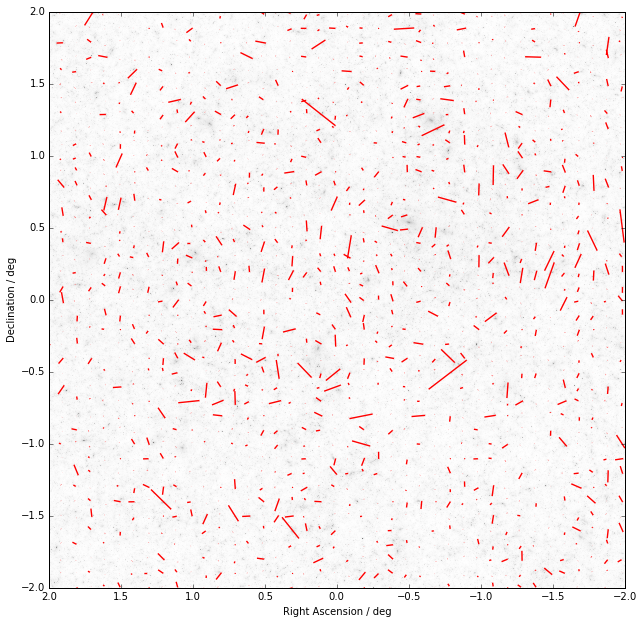

In [8]:
K.plot()
S.plot()

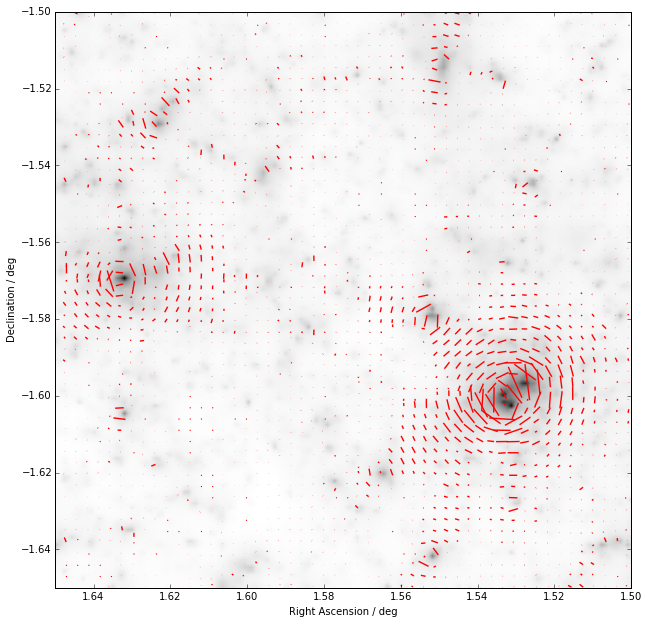

In [9]:
# Now works with subplots
K.plot(subplot=[1.65,1.5,-1.65,-1.5])
S.plot(subplot=[1.65,1.5,-1.65,-1.5])

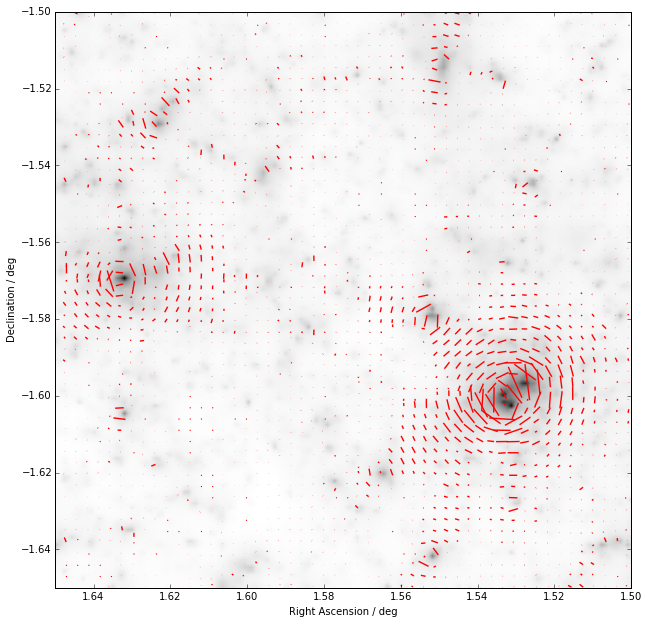

In [10]:
# The shearmap can also figure out the subplot from Kappamap if nothing is passed!
K.plot(subplot=[1.65,1.5,-1.65,-1.5])
S.plot()

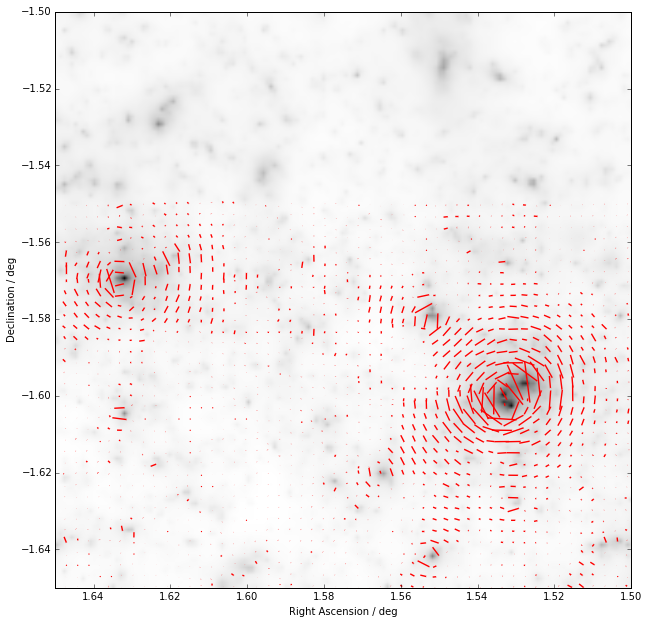

In [11]:
# If different subplots are passed, the Kappamap subplot is viewed and the overlapping shear sticks are plotted.
K.plot(subplot=[1.65,1.5,-1.65,-1.5])
S.plot(subplot=[1.65,1.5,-1.65,-1.55])

Now adding catalogs:

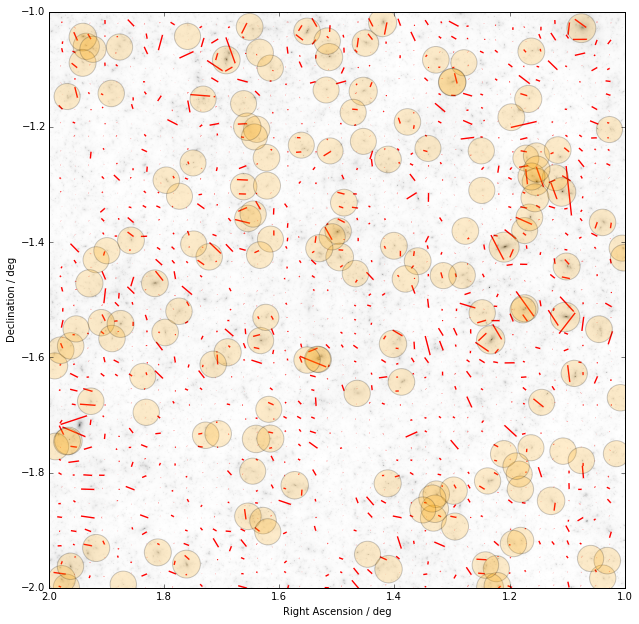

In [12]:
# Whole (0,0) field:
K.plot(subplot=[2,1,-2,-1])
S.plot()
F.plot(mass_lim=[10**11,10**12])

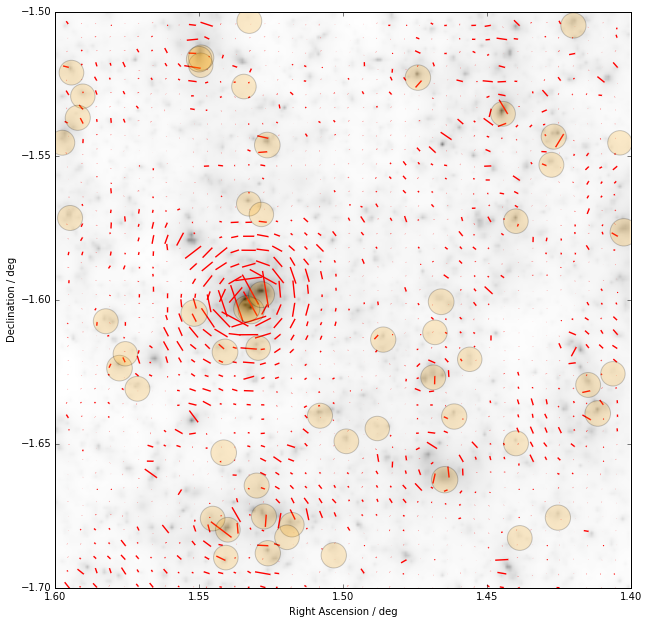

In [13]:
# Zoomed in:
K.plot(subplot=[1.6,1.4,-1.7,-1.5])
S.plot()
F.plot(mass_lim=[10**10.75,10**12])

However, `ForegroundCatalog` instances can plot themselves without any maps:

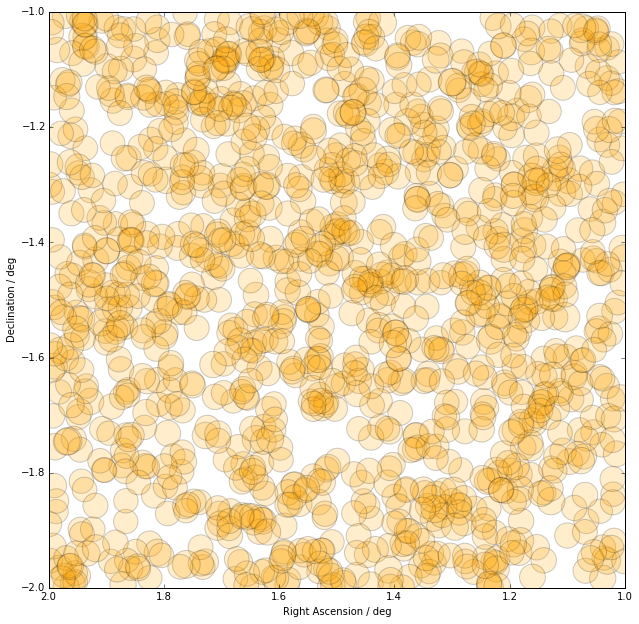

In [14]:
F.plot(mass_lim=[10**10.75,10**12])

We can also add a generated background catalog of galaxies to the overlays:

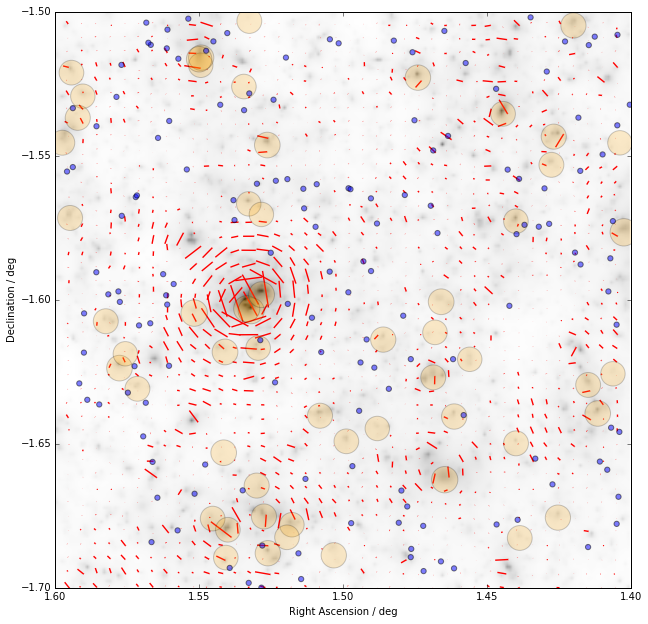

In [15]:
K.plot(fig_size=10,subplot=[1.6,1.4,-1.7,-1.5])
S.plot()
F.plot(mass_lim=[10**10.75,10**12])
B.plot(mass_lim=[10**11.95,10**12])

The background galaxies by default plot as points as there are so numerous (notice the very small mass range allowed in the previous plot). However, they can also be plotted as ellipses to show their intrinsic shape using the optional parameter `graph='ellipse'`. The foreground and background galaxies use the same mass scaling for plotting.

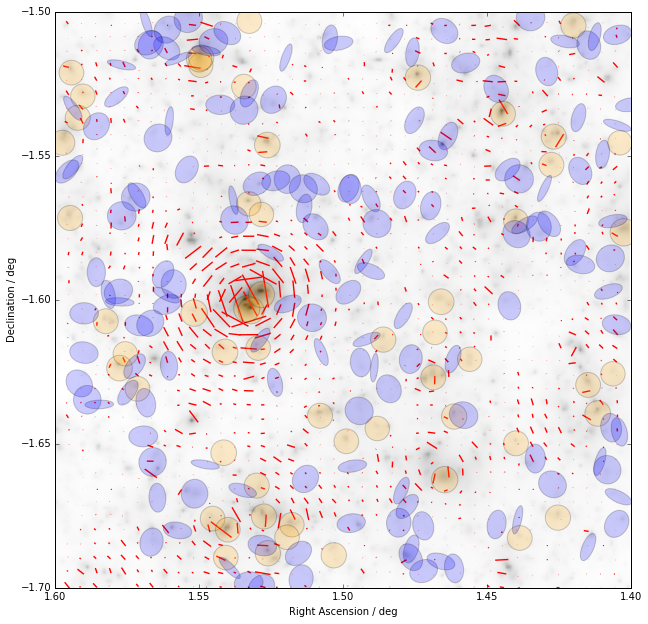

In [16]:
K.plot(fig_size=10,subplot=[1.6,1.4,-1.7,-1.5])
S.plot()
F.plot(mass_lim=[10**10.75,10**12])
B.plot(mass_lim=[10**11.95,10**12],graph='ellipse')

Like foreground catalogs, a background catalog can also plot itself when no maps are present.

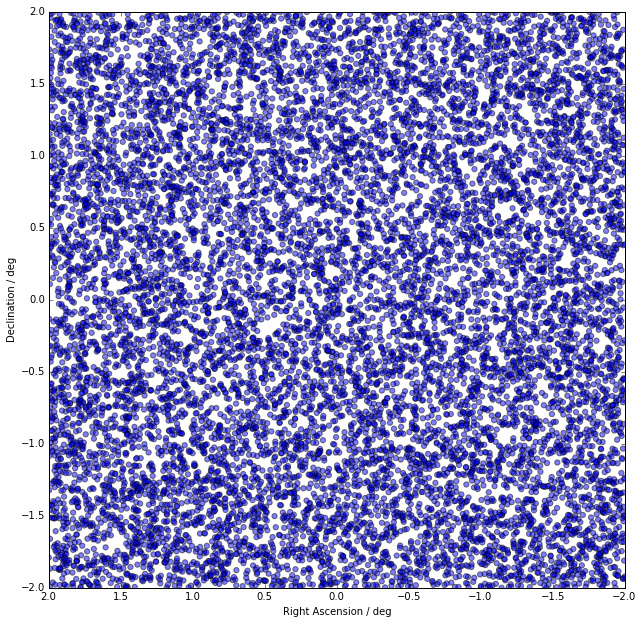

In [17]:
B.plot(mass_lim=[10**11.99,10**12])

## Scratch pad

Trying out different ideas, maybe plot background sources as actual ellipses? Too much?

-1.99999203031 1.99999976291


(0, 10)

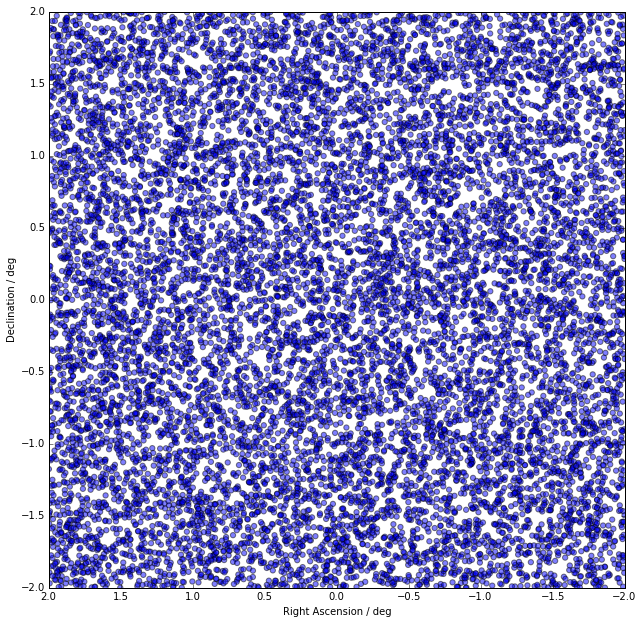

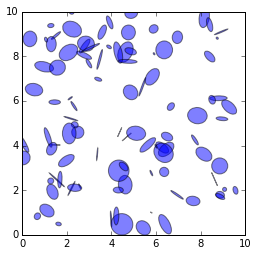

In [18]:
from pylab import figure, show, rand
from matplotlib.patches import Ellipse

B = pangloss.BackgroundCatalog()
B.plot(mass_lim=[10**11.99,10**12])
print B.ra_min,B.ra_max
NUM = 100

ells = [Ellipse(xy=rand(2)*10, width=rand(), height=rand(), angle=rand()*360)
        for i in range(NUM)]

fig = figure()
ax= fig.add_subplot(111, aspect='equal')
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(.5)
    e.set_facecolor('blue')

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

(0, 10)

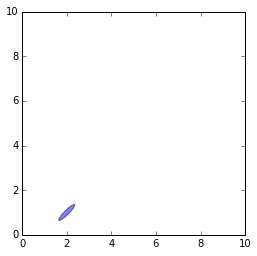

In [19]:
ells = [Ellipse(xy=[2,1], width=1, height=.2, angle=45)]

fig = figure()
ax= fig.add_subplot(111, aspect='equal')
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(.5)
    e.set_facecolor('blue')

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

In [29]:
B = pangloss.BackgroundCatalog(e_mod_lim=[0,0.75])

In [30]:
#B.plot(fig_size=15,subplot=[2,1.75,-2,-1.75],mass_lim=[10**11.95,10**12],graph='ellipse')

In [ ]:
#B = pangloss.BackgroundCatalog()

In [ ]:
B.lens_by_map(K,S,plot=True,subplot=[1.6,1.4,-1.7,-1.5],graph='ellipse')

In [ ]:
K.plot(fig_size=15,subplot=[1.65,1.5,-1.65,-1.5])
S.plot()
#F.plot(mass_lim=[10**10.75,10**12])
B.plot(mass_lim=[10**10.9,10**11.2],graph='ellipse',lensed='both')

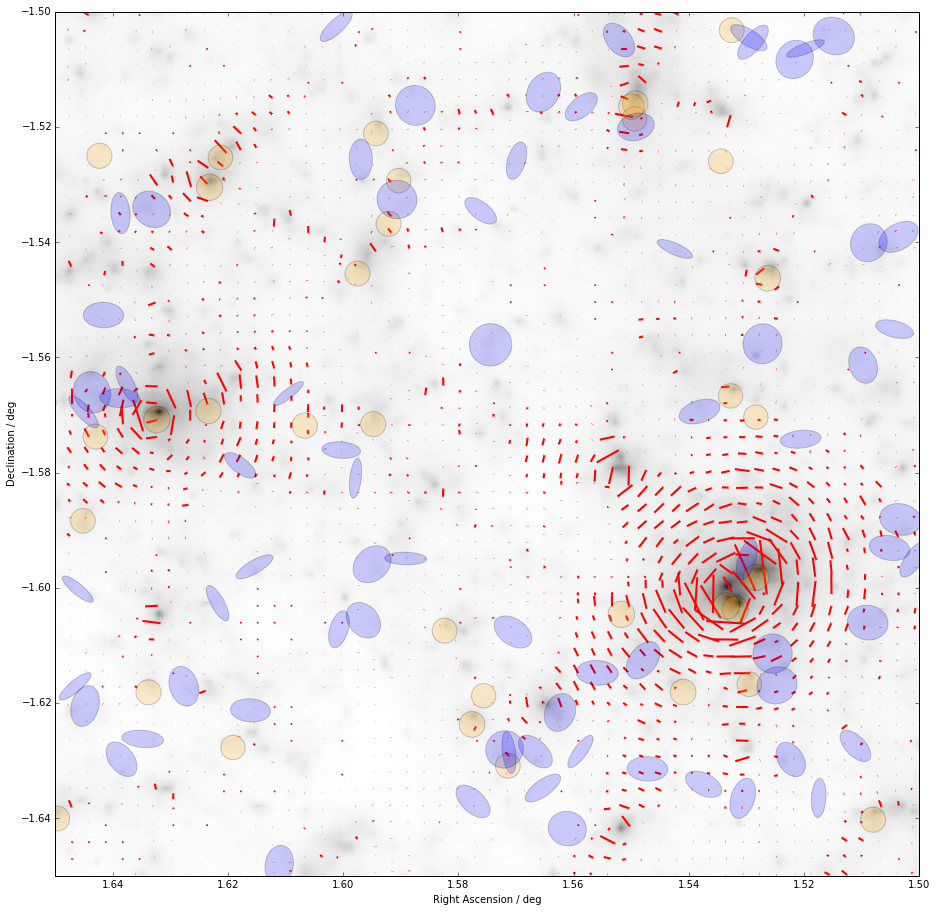

In [25]:
K.plot(fig_size=15,subplot=[1.65,1.5,-1.65,-1.5])
S.plot()
F.plot(mass_lim=[10**10.75,10**12])
B.plot(mass_lim=[10**10.9,10**11.2],graph='ellipse',lensed=False)